In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-5ca29fad52da>:14: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preview'] = True


In [4]:
# dir to file testdev_balanced_questions_en.json
dir_to_answers = '../datasets/xGQA/annotations/zero_shot/'

# dir to few_shot and zero_shot results
dir_to_results = '../results/xgqa/'

In [5]:
answers = {}
with open(os.path.join(dir_to_answers, 'testdev_balanced_questions_en.json'), 'r') as f:
    data = json.load(f)
    for k, v in data.items():
        answers[k] = {}
        answers[k]['answer'] = v['answer']
        answers[k]['structural'] = v['types']['structural']

In [7]:
model2name = {
    "ctrl_muniter": "mUNITER",
    "ctrl_xuniter": "xUNITER",
    "uc2": "UC$^2$",
    "m3p": "M$^3$P",
}
models = ['ctrl_muniter', 'ctrl_xuniter', 'uc2', 'm3p']

In [9]:
langs = ['bn', 'de', 'id', 'ko', 'pt', 'ru', 'zh']

In [18]:
num_images = [0,1,5,10,20,25,48]
num_questions = [0,27,155,317,594,704,1490]

In [21]:
experiments = {
    'shot' : [],
    'model' : [],
    'language' : [],
    'structural' : [],
    'steps' : [],
    'score' : []
}

In [22]:
shot = "zero_shot"
steps = 0
for model in models:
    for language in langs:
        with open(dir_to_results + f'{shot}/{model}/test_{language}_{steps}_result.json', 'r') as f:
            data = json.load(f)

            verify_t = 0.0
            verify_c = 0.0

            query_t = 0.0
            query_c = 0.0

            logical_t = 0.0
            logical_c = 0.0

            choose_t = 0.0
            choose_c = 0.0

            compare_t = 0.0
            compare_c = 0.0

            for d in data:
                q_id = d['questionId']
                pred = d['prediction']
                answer = answers[q_id]['answer']
                structural = answers[q_id]['structural']

                if structural == 'verify':
                    verify_c += 1.0
                    if pred == answer:
                        verify_t +=1.0

                elif structural == 'query':
                    query_c += 1.0
                    if pred == answer:
                        query_t +=1.0

                elif structural == 'logical':
                    logical_c += 1.0
                    if pred == answer:
                        logical_t +=1.0

                elif structural == 'choose':
                    choose_c += 1.0
                    if pred == answer:
                        choose_t +=1.0

                elif structural == 'compare':
                    compare_c += 1.0
                    if pred == answer:
                        compare_t +=1.0

            experiments['shot'].append(shot)
            experiments['model'].append(model)
            experiments['language'].append(language)
            experiments['steps'].append(steps)
            experiments['structural'].append('Verify')
            experiments['score'].append(verify_t/verify_c)

            experiments['shot'].append(shot)
            experiments['model'].append(model)
            experiments['language'].append(language)
            experiments['steps'].append(steps)
            experiments['structural'].append('Query')
            experiments['score'].append(query_t/query_c)

            experiments['shot'].append(shot)
            experiments['model'].append(model)
            experiments['language'].append(language)
            experiments['steps'].append(steps)
            experiments['structural'].append('Logical')
            experiments['score'].append(logical_t/logical_c)

            experiments['shot'].append(shot)
            experiments['model'].append(model)
            experiments['language'].append(language)
            experiments['steps'].append(steps)
            experiments['structural'].append('Choose')
            experiments['score'].append(choose_t/choose_c)

            experiments['shot'].append(shot)
            experiments['model'].append(model)
            experiments['language'].append(language)
            experiments['steps'].append(steps)
            experiments['structural'].append('Compare')
            experiments['score'].append(compare_t/compare_c)

In [23]:
shot = "few_shot"
for steps in num_images[1:]:
    for model in models:
        for language in langs:
            with open(dir_to_results + f'{shot}/{model}/test_{language}_{steps}_result.json', 'r') as f:
                data = json.load(f)

                verify_t = 0.0
                verify_c = 0.0

                query_t = 0.0
                query_c = 0.0

                logical_t = 0.0
                logical_c = 0.0

                choose_t = 0.0
                choose_c = 0.0

                compare_t = 0.0
                compare_c = 0.0

                for d in data:
                    q_id = d['questionId']
                    pred = d['prediction']
                    answer = answers[q_id]['answer']
                    structural = answers[q_id]['structural']

                    if structural == 'verify':
                        verify_c += 1.0
                        if pred == answer:
                            verify_t +=1.0

                    elif structural == 'query':
                        query_c += 1.0
                        if pred == answer:
                            query_t +=1.0

                    elif structural == 'logical':
                        logical_c += 1.0
                        if pred == answer:
                            logical_t +=1.0

                    elif structural == 'choose':
                        choose_c += 1.0
                        if pred == answer:
                            choose_t +=1.0

                    elif structural == 'compare':
                        compare_c += 1.0
                        if pred == answer:
                            compare_t +=1.0

                experiments['shot'].append(shot)
                experiments['model'].append(model)
                experiments['language'].append(language)
                experiments['steps'].append(steps)
                experiments['structural'].append('Verify')
                experiments['score'].append(verify_t/verify_c)

                experiments['shot'].append(shot)
                experiments['model'].append(model)
                experiments['language'].append(language)
                experiments['steps'].append(steps)
                experiments['structural'].append('Query')
                experiments['score'].append(query_t/query_c)

                experiments['shot'].append(shot)
                experiments['model'].append(model)
                experiments['language'].append(language)
                experiments['steps'].append(steps)
                experiments['structural'].append('Logical')
                experiments['score'].append(logical_t/logical_c)

                experiments['shot'].append(shot)
                experiments['model'].append(model)
                experiments['language'].append(language)
                experiments['steps'].append(steps)
                experiments['structural'].append('Choose')
                experiments['score'].append(choose_t/choose_c)

                experiments['shot'].append(shot)
                experiments['model'].append(model)
                experiments['language'].append(language)
                experiments['steps'].append(steps)
                experiments['structural'].append('Compare')
                experiments['score'].append(compare_t/compare_c)

In [24]:
df = pd.DataFrame(experiments)
print(df.shape)
df.head()

(980, 6)


,shot,model,language,structural,steps,score
0,zero_shot,ctrl_muniter,bn,Verify,0,0.021314
1,zero_shot,ctrl_muniter,bn,Query,0,0.034240
2,zero_shot,ctrl_muniter,bn,Logical,0,0.038824
3,zero_shot,ctrl_muniter,bn,Choose,0,0.009743
4,zero_shot,ctrl_muniter,bn,Compare,0,0.022071


In [27]:
for i, s in enumerate(set(df['structural'])):
    stru_df = df.loc[(df['structural'] == s)]
    for im, m in enumerate(models):
        mod_df = stru_df.loc[(stru_df['model'] == m)]
        xs = num_questions
        ys = [100 * np.mean(mod_df.loc[(mod_df['steps'] == x)]) for x in sorted(set(mod_df['steps']))]

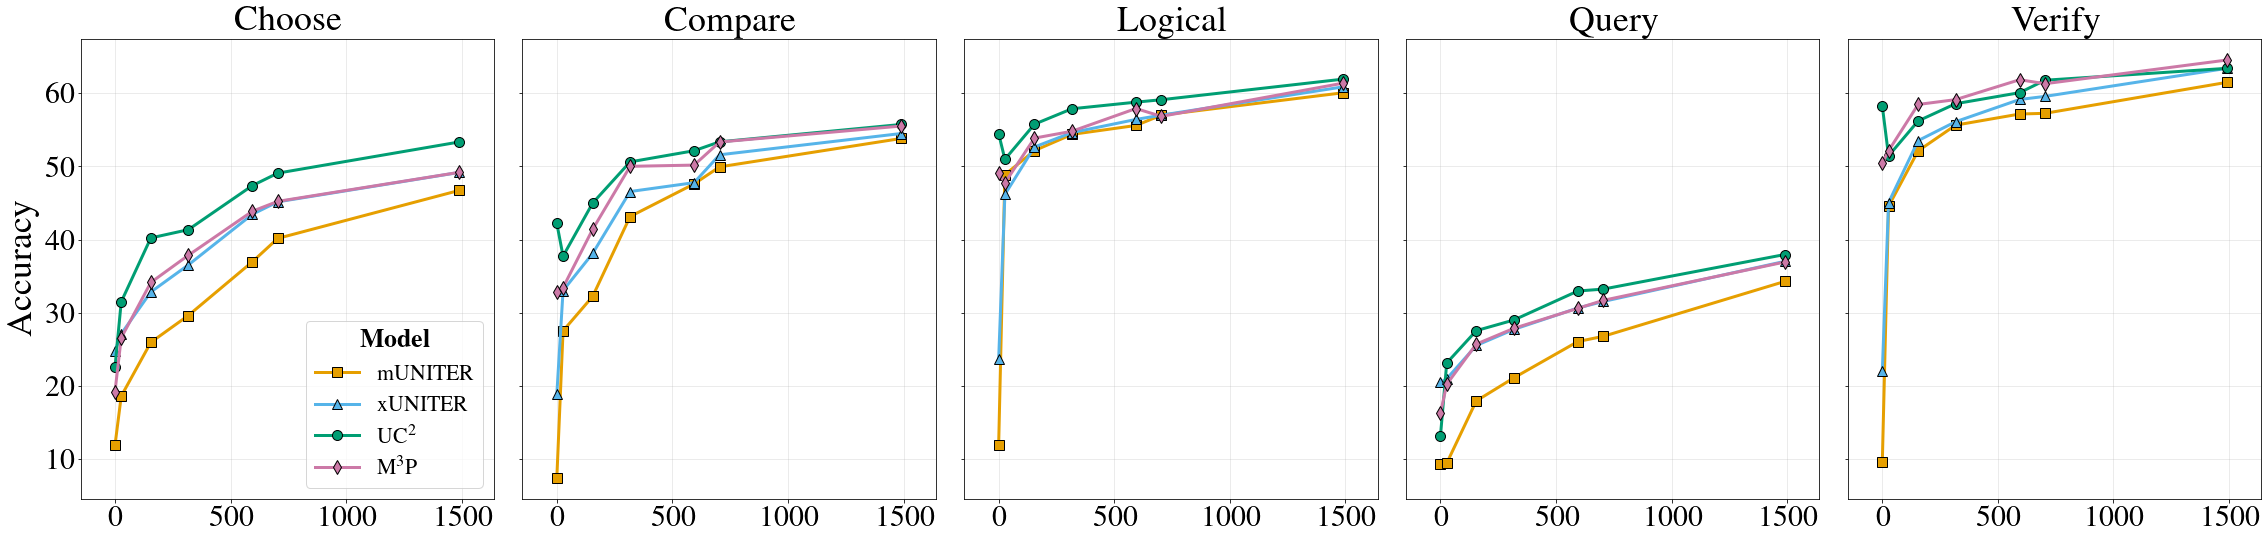

In [31]:
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

colors = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#CC79A7']
markers = ['X', 's', '^', 'o', 'd']

f, axs = plt.subplots(1, 5, figsize=(32,8), sharey=True)

for i, s in enumerate(sorted(set(df['structural']))):
    ax = axs[i]
    stru_df = df.loc[(df['structural'] == s)]
    for im, m in enumerate(['ctrl_muniter', 'ctrl_xuniter', 'uc2', 'm3p']):
        mod_df = stru_df.loc[(stru_df['model'] == m)]
        xs = num_questions
        ys = [100 * np.mean(mod_df.loc[(mod_df['steps'] == x)]['score'].values) for x in sorted(set(mod_df['steps']))]
        ax.plot(xs, ys, label=model2name[m], marker=markers[im+1], markersize=10, linewidth=3, markeredgecolor='k', color=colors[im+1])
    ax.set_title(s, fontsize=36)

axs[0].set_ylabel('Accuracy', fontsize=36)
axs[0].legend(loc='lower right', ncol=1, title='\\textbf{Model}', title_fontsize=26, fontsize=22)

for ix, ax in enumerate(axs):
    ax.grid(alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.margins(x=0.1)

f.tight_layout(pad=2.5)

f.savefig("xGQA_Struct_FewShot.pdf", bbox_inches='tight')